In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split


In [2]:
#Import data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, sep=';')
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [3]:
# Split the dataset into training and testing sets
X = data[['alcohol']].values
y = data['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [4]:
# Create a linear regression object and fit the model to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predict the quality of the wine for the test data
y_pred = regressor.predict(X_test)
# Print the model's parameters
print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)
# Print the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('R-squared: ', r2)


Coefficients:  [0.31100587]
Intercept:  2.62069686856468
Mean Squared Error:  0.730644234019256
Root Mean Squared Error:  0.8547773008329457
R-squared:  0.1710201454832173


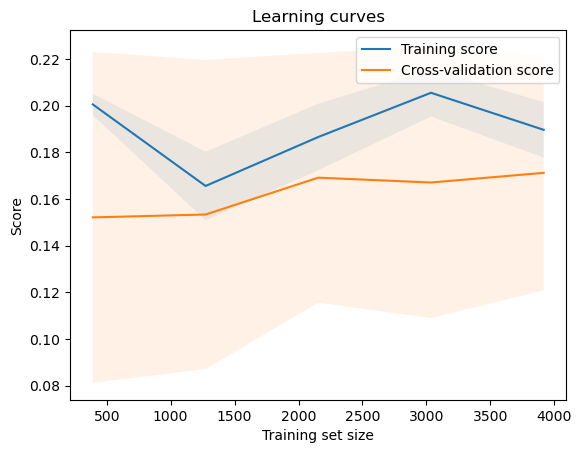

In [5]:

# Plot the learning curves
train_sizes, train_scores, test_scores = learning_curve(regressor, X, y, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning curves')
plt.legend()
plt.show()


In [6]:
train_sizes

array([ 391, 1273, 2154, 3036, 3918])

In [7]:
train_scores

array([[0.19135051, 0.20286731, 0.20286731, 0.20286731, 0.20286731],
       [0.15858014, 0.13973894, 0.17655132, 0.17655132, 0.17655132],
       [0.20880489, 0.19425249, 0.18709334, 0.17138684, 0.17138684],
       [0.22249348, 0.21081001, 0.20250485, 0.19359538, 0.19838998],
       [0.19839654, 0.18851682, 0.18182426, 0.17293846, 0.20663039]])

In [8]:
test_scores 

array([[0.17190738, 0.18859221, 0.19393544, 0.19501437, 0.01110232],
       [0.15952351, 0.19176156, 0.19151582, 0.20026073, 0.02371787],
       [0.15951429, 0.19624999, 0.20252129, 0.21833535, 0.0691351 ],
       [0.1595731 , 0.19619985, 0.20477136, 0.2174897 , 0.05734617],
       [0.15535547, 0.19257443, 0.20308835, 0.22426451, 0.08084605]])